In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats
from datetime import datetime
import seaborn as sns

mpl.rcParams['figure.dpi'] = 80


In [2]:
cities_years = {
    'London': [2018, 2019, 2020],
    'Los_Angeles': [2018, 2019, 2020],
    'San_Francisco': [2018, 2019, 2020],
}


In [3]:
from collections import defaultdict
dfs = defaultdict(dict)
dfall = []

for city, years in cities_years.items():
    for year in years:
        print("Loading: ", city, year)
        df = pd.read_csv("../data/raw/observations_v2/CNC_{}_{}.csv".format(city, year))
        dfs[city][year] = df
        dfall.append(df)

dfall = pd.concat(dfall)
dfs['London'][2018].head()

Loading:  London 2018
Loading:  London 2019
Loading:  London 2020
Loading:  Los_Angeles 2018
Loading:  Los_Angeles 2019
Loading:  Los_Angeles 2020
Loading:  San_Francisco 2018
Loading:  San_Francisco 2019
Loading:  San_Francisco 2020


,id,observed_on_string,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,user_login,quality_grade,...,preferred_common_name,iconic_taxon_name,taxon_rank,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications
0,11479007,2018-04-27 7:52:34 am BST,2018-04-27T07:52:34+00:00,Etc/UTC,2018-04-27T07:06:17+00:00,2018-04-27T09:26:56+00:00,NaN,159021,muki,research,...,lesser celandine,Plantae,species,204212,True,False,False,26862,26862,"[{'user_id': 353381, 'category': 'improving', ..."
1,11480212,2018-04-27 8:39:41 am BST,2018-04-27T08:39:41+01:00,Europe/London,2018-04-27T09:02:52+01:00,2019-01-29T21:16:34+00:00,NaN,664459,lucyrobinsonnhm,research,...,Feral Pigeon,Aves,variety,3017,False,False,False,38831,38831,"[{'user_id': 29729, 'category': 'supporting', ..."
2,11480902,Fri Apr 27 2018 08:34:31 GMT+0100 (GMT+1),2018-04-27T08:34:31+02:00,Europe/Amsterdam,2018-04-27T10:42:01+02:00,2018-04-27T13:01:49+02:00,NaN,908315,tess26,casual,...,Spanish Bluebell,Plantae,species,56095,False,False,False,2801,2801,"[{'user_id': 908315, 'category': 'leading', 'd..."
3,11481097,Fri Apr 27 2018 09:54:35 GMT+0100 (GMT+1),2018-04-27T09:54:35+02:00,Europe/Amsterdam,2018-04-27T10:54:45+02:00,2018-04-27T22:23:41+02:00,NaN,796473,bryonycross,research,...,Green Alkanet,Plantae,species,156638,False,False,False,4509,4509,"[{'user_id': 160, 'category': 'improving', 'di..."
4,11482247,2018-04-27 8:42:21 am BST,2018-04-27T08:42:21+01:00,Europe/London,2018-04-27T11:09:55+01:00,2018-04-27T16:37:31+01:00,NaN,664459,lucyrobinsonnhm,research,...,London Plane,Plantae,hybrid,49664,False,False,False,5475,5475,"[{'user_id': 160, 'category': 'supporting', 'd..."


In [4]:
def get_obs_idents_per_user(dfcity):
    """ Calculate the number of observations and identifications per user 
    
    Input:
    ------
     - dfcity: pd.DataFrame
         The observations data for one city.
    
    Returns:
    -------
     - dfobsident: pd.DataFrame
         Has the columns: user_id | n_obs | n_idents
    
    """
    from collections import defaultdict
    n_obs = defaultdict(int)
    n_idents = defaultdict(int)


    for _, row in dfcity.iterrows():
        # Count observation to user that observed
        user_obs = row['user_id']
        n_obs[user_obs] += 1

        # Count identications the user did
        identifications = eval(row['identifications'])
        for ident in identifications:
            user_ident = ident['user_id']
            if user_ident != user_obs:
                n_idents[user_ident] += 1
    # Create dataframe with observations, identifications
    dfobsident = pd.DataFrame([n_obs, n_idents]).T.reset_index().convert_dtypes().fillna(0)
    dfobsident.columns = ['user_id', 'n_obs', 'n_idents']
    dfobsident
    return dfobsident

In [5]:
dfcity = dfs['London'][2018]
lon2018 = get_obs_idents_per_user(dfcity)
lon2018 = lon2018[lon2018['n_obs'] >= 1]
lon2018.head()

,user_id,n_obs,n_idents
0,159021,21,0
1,664459,150,55
2,908315,3,0
3,796473,26,1
4,903018,34,0


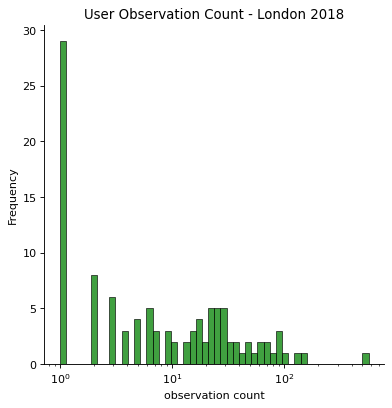

In [6]:

# Use the displot function to create a histogram of the n_obs column
sns.displot(data=lon2018, x='n_obs', log_scale=True, bins=50, color='green')

# Set the x and y scales to log
#plt.xscale('log')
#plt.yscale('log')

# Add a title and labels
plt.title("User Observation Count - London 2018")
plt.xlabel('observation count')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [8]:
dfcity = dfs['London'][2019]
lon2019 = get_obs_idents_per_user(dfcity)
lon2019 = lon2019[lon2019['n_obs'] >= 1]
lon2019.head()

,user_id,n_obs,n_idents
0,1595601,7,0
1,1613966,6,0
2,1665840,3,0
3,1624432,29,0
4,1653354,113,65


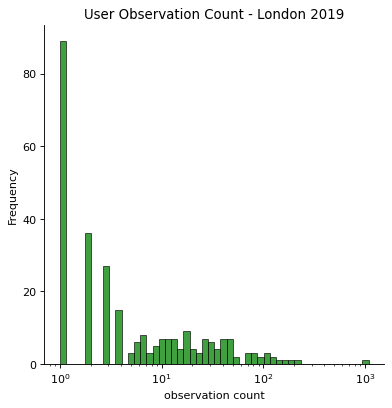

In [9]:

# Use the displot function to create a histogram of the n_obs column
sns.displot(data=lon2019, x='n_obs', log_scale=True, bins=50, color='green')

# Set the x and y scales to log
#plt.xscale('log')
#plt.yscale('log')

# Add a title and labels
plt.title("User Observation Count - London 2019")
plt.xlabel('observation count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [10]:
dfcity = dfs['London'][2020]
lon2020 = get_obs_idents_per_user(dfcity)
lon2020 = lon2020[lon2020['n_obs'] >= 1]
lon2020.head()

,user_id,n_obs,n_idents
0,2295352,2,0
1,2777317,1,0
2,1653354,131,116
3,1488476,355,1218
4,908795,13,0


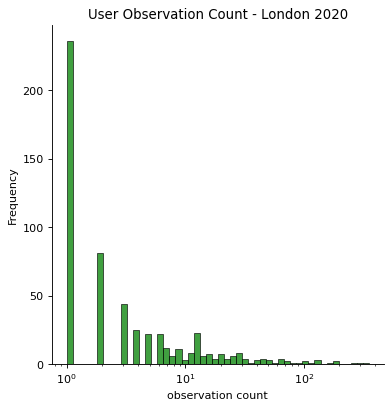

In [11]:

# Use the displot function to create a histogram of the n_obs column
sns.displot(data=lon2020, x='n_obs', log_scale=True, bins=50, color='green')

# Set the x and y scales to log
#plt.xscale('log')
#plt.yscale('log')

# Add a title and labels
plt.title("User Observation Count - London 2020")
plt.xlabel('observation count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [24]:
## Plotting all three in one figure 

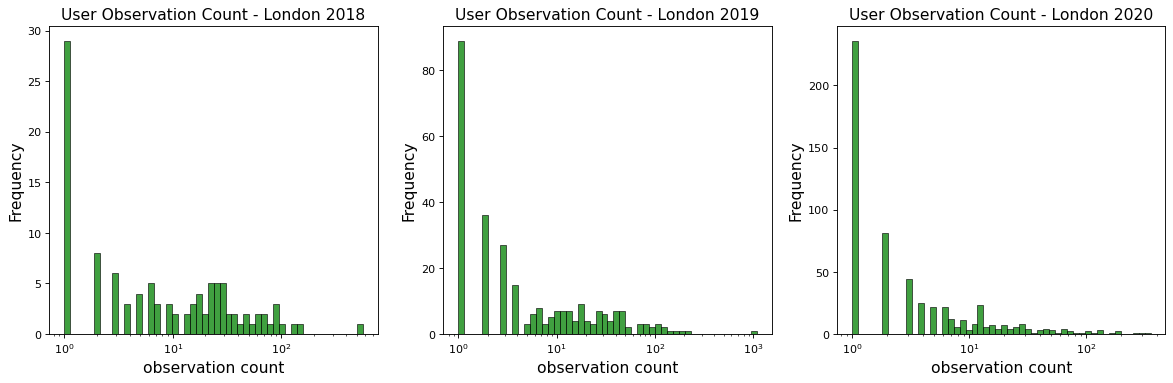

In [19]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(18, 5))

# Plot the first dataframe in the first subplot
sns.histplot(data=lon2018, x='n_obs', log_scale=True, bins=50, color='green', ax=ax1)
ax1.set_title("User Observation Count - London 2018",fontsize =14)
ax1.set_xlabel('observation count',fontsize =14)
ax1.set_ylabel('Frequency',fontsize =14)

# Plot the second dataframe in the second subplot
sns.histplot(data=lon2019, x='n_obs', log_scale=True, bins=50, color='green',ax=ax2)
ax2.set_title('User Observation Count - London 2019',fontsize =14)
ax2.set_xlabel('observation count',fontsize =14)
ax2.set_ylabel('Frequency',fontsize =14)

# Plot the third dataframe in the third subplot
sns.histplot(data=lon2020, x='n_obs', log_scale=True, bins=50, color='green',ax=ax3)
ax3.set_title("User Observation Count - London 2020", fontsize =14)
ax3.set_xlabel('observation count',fontsize =14)
ax3.set_ylabel('Frequency',fontsize =14)

# Show the plot
plt.show()


## San_Francisco

In [21]:
dfcity = dfs['San_Francisco'][2018]
sf2018 = get_obs_idents_per_user(dfcity)
sf2018 = sf2018[sf2018['n_obs'] >= 1]
sf2018.head()

,user_id,n_obs,n_idents
0,898721,8,2
1,28,305,704
2,819,466,229
3,2692,335,360
4,28037,138,575


In [22]:
dfcity = dfs['San_Francisco'][2019]
sf2019 = get_obs_idents_per_user(dfcity)
sf2019 = sf2019[sf2019['n_obs'] >= 1]
sf2019.head()

,user_id,n_obs,n_idents
0,469701,1,0
1,402292,11,3
2,3494,558,140
3,34038,699,501
4,1,166,449


In [23]:
dfcity = dfs['San_Francisco'][2020]
sf2020 = get_obs_idents_per_user(dfcity)
sf2020 = sf2020[sf2020['n_obs'] >= 1]
sf2020.head()

,user_id,n_obs,n_idents
0,2692,278,204
1,179103,369,3494
2,819,319,57
3,2825732,34,3
4,2556410,4,0


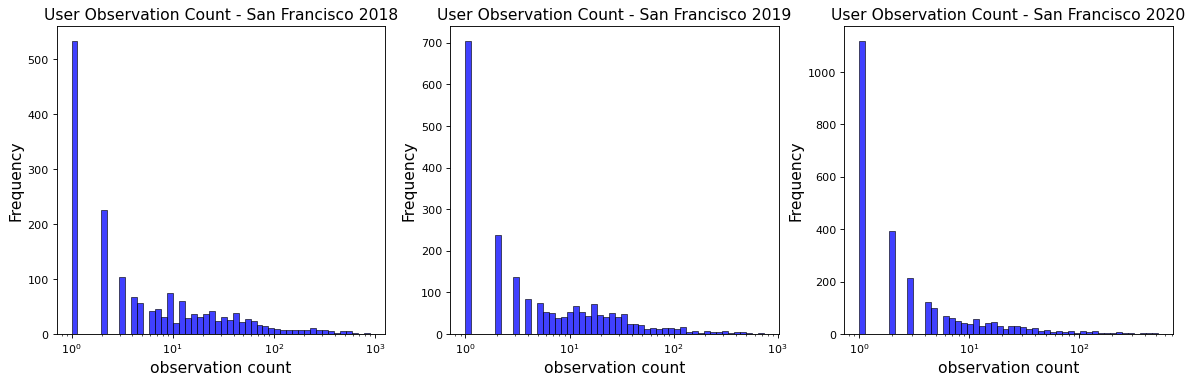

In [32]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(18, 5))

# Plot the first dataframe in the first subplot
sns.histplot(data=sf2018, x='n_obs', log_scale=True, bins=50, color='blue', ax=ax1)
ax1.set_title("User Observation Count - San Francisco 2018",fontsize =14)
ax1.set_xlabel('observation count',fontsize =14)
ax1.set_ylabel('Frequency',fontsize =14)

# Plot the second dataframe in the second subplot
sns.histplot(data=sf2019, x='n_obs', log_scale=True, bins=50, color='blue',ax=ax2)
ax2.set_title('User Observation Count - San Francisco 2019',fontsize =14)
ax2.set_xlabel('observation count',fontsize =14)
ax2.set_ylabel('Frequency',fontsize =14)

# Plot the third dataframe in the third subplot
sns.histplot(data=sf2020, x='n_obs', log_scale=True, bins=50, color='blue',ax=ax3)
ax3.set_title("User Observation Count - San Francisco 2020", fontsize =14)
ax3.set_xlabel('observation count',fontsize =14)
ax3.set_ylabel('Frequency',fontsize =14)

# Show the plot
plt.show()


## Los Angeles 

In [26]:
dfcity = dfs['Los_Angeles'][2018]
la2018 = get_obs_idents_per_user(dfcity)
la2018 = la2018[la2018['n_obs'] >= 1]
la2018.head()

,user_id,n_obs,n_idents
0,630902,28,0
1,907908,92,1
2,74669,442,340
3,6743,158,14
4,81779,552,310


In [27]:
dfcity = dfs['Los_Angeles'][2019]
la2019 = get_obs_idents_per_user(dfcity)
la2019 = la2019[la2019['n_obs'] >= 1]
la2019.head()

,user_id,n_obs,n_idents
0,496245,580,0
1,1653126,33,0
2,94012,275,229
3,1606340,1,0
4,154824,688,20


In [28]:
dfcity = dfs['Los_Angeles'][2020]
la2020 = get_obs_idents_per_user(dfcity)
la2020 = la2020[la2020['n_obs'] >= 1]
la2020.head()

,user_id,n_obs,n_idents
0,907908,2,0
1,2556338,14,0
2,146517,22,1
3,74669,229,125
4,403949,9,0


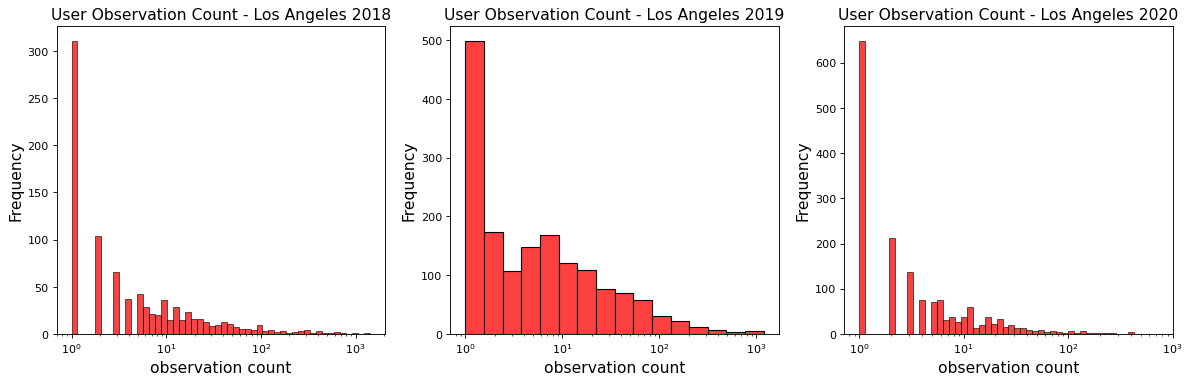

In [34]:
import matplotlib.pyplot as plt

# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(18, 5))

# Plot the first dataframe in the first subplot
sns.histplot(data=la2018, x='n_obs', log_scale=True, bins=50, color='red', ax=ax1)
ax1.set_title("User Observation Count - Los Angeles 2018",fontsize =14)
ax1.set_xlabel('observation count',fontsize =14)
ax1.set_ylabel('Frequency',fontsize =14)

# Plot the second dataframe in the second subplot
sns.histplot(data=la2019, x='n_obs', log_scale=True, color='red',ax=ax2)
ax2.set_title('User Observation Count - Los Angeles 2019',fontsize =14)
ax2.set_xlabel('observation count',fontsize =14)
ax2.set_ylabel('Frequency',fontsize =14)

# Plot the third dataframe in the third subplot
sns.histplot(data=la2020, x='n_obs', log_scale=True, bins=50, color='red',ax=ax3)
ax3.set_title("User Observation Count - Los Angeles 2020", fontsize =14)
ax3.set_xlabel('observation count',fontsize =14)
ax3.set_ylabel('Frequency',fontsize =14)

# Show the plot
plt.show()